### Final project - Determine best locations in Paris  to establish new stores for a fashion retailer

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

In [2]:
pip install BeautifulSoup4

     |████████████████████████████████| 112kB 27.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Download the dataset and read it into a pandas dataframe.
#The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart  and then placed on the GitHub repo 

paris = pd.read_csv('https://raw.githubusercontent.com/radhikab890/Coursera_Capstone/master/Districts_Paris.csv')
paris

,CAR,NAME,NSQAR,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,75103,3eme Ardt,750001537,1.170883e+06,4519.263648,48.862872,2.360001
1,2,Bourse,750000002,75102,2eme Ardt,750001537,9.911537e+05,4554.104360,48.868279,2.342803
2,17,Batignolles-Monceau,750000017,75117,17eme Ardt,750001537,5.668835e+06,10775.579520,48.887327,2.306777
3,7,Palais-Bourbon,750000007,75107,7eme Ardt,750001537,4.090057e+06,8099.424883,48.856174,2.312188
4,4,Hotel-de-Ville,750000004,75104,4eme Ardt,750001537,1.600586e+06,5420.908434,48.854341,2.357630
5,8,elysee,750000008,75108,8eme Ardt,750001537,3.880036e+06,7880.533268,48.872721,2.312554
6,18,Buttes-Montmartre,750000018,75118,18eme Ardt,750001537,5.996051e+06,9916.464176,48.892569,2.348161
7,1,Louvre,750000001,75101,1er Ardt,750001537,1.824613e+06,6054.936862,48.862563,2.336443
8,11,Popincourt,750000011,75111,11eme Ardt,750001537,3.665442e+06,8282.011886,48.859059,2.380058
9,13,Gobelins,750000013,75113,13eme Ardt,750001537,7.149311e+06,11546.546530,48.828388,2.362272


### Exploring, Wrangling and Cleaning the Data

In [4]:
# Rename the necessary columns 

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Dist_Num', 'Geometry_X ': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Dist_Num,Neighborhood,NSQAR,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,75103,3eme Ardt,750001537,1.170883e+06,4519.263648,48.862872,2.360001
1,2,Bourse,750000002,75102,2eme Ardt,750001537,9.911537e+05,4554.104360,48.868279,2.342803
2,17,Batignolles-Monceau,750000017,75117,17eme Ardt,750001537,5.668835e+06,10775.579520,48.887327,2.306777
3,7,Palais-Bourbon,750000007,75107,7eme Ardt,750001537,4.090057e+06,8099.424883,48.856174,2.312188
4,4,Hotel-de-Ville,750000004,75104,4eme Ardt,750001537,1.600586e+06,5420.908434,48.854341,2.357630
5,8,elysee,750000008,75108,8eme Ardt,750001537,3.880036e+06,7880.533268,48.872721,2.312554
6,18,Buttes-Montmartre,750000018,75118,18eme Ardt,750001537,5.996051e+06,9916.464176,48.892569,2.348161
7,1,Louvre,750000001,75101,1er Ardt,750001537,1.824613e+06,6054.936862,48.862563,2.336443
8,11,Popincourt,750000011,75111,11eme Ardt,750001537,3.665442e+06,8282.011886,48.859059,2.380058
9,13,Gobelins,750000013,75113,13eme Ardt,750001537,7.149311e+06,11546.546530,48.828388,2.362272


In [5]:
# Clean up the dataset to remove unnecessary columns

paris.drop(['NSQAR','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Dist_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,2,Bourse,2eme Ardt,48.868279,2.342803
2,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777
3,7,Palais-Bourbon,7eme Ardt,48.856174,2.312188
4,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
5,8,elysee,8eme Ardt,48.872721,2.312554
6,18,Buttes-Montmartre,18eme Ardt,48.892569,2.348161
7,1,Louvre,1er Ardt,48.862563,2.336443
8,11,Popincourt,11eme Ardt,48.859059,2.380058
9,13,Gobelins,13eme Ardt,48.828388,2.362272


In [6]:
paris.shape

(20, 5)

#### Using geopy library to get the latitude and longitude of Paris

In [7]:
address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


#### Create map of Paris with all 20 districts

In [8]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

#### Now use the Foursquare API to explore the Districts of Paris (Neighborhoods)

In [9]:
#use foursquare credentials 
CLIENT_ID = 'OCDLN33KRIIZDD5XE3FN4BIUJYHTJVZC2PRMYKY4WXR2UJTA'
CLIENT_SECRET = 'RTEPUX15NKDJSOWNPXLF5OCXFMOVTHY4OSDGRFMHG1OC1EWJ' 
VERSION = '20180605'

#### Let's explore the first district in our dataframe to become familiar with the data (use the French descriptive arrondissement name)

In [10]:
paris.loc[0, 'French_Name']
print('So the first dictrict we are going to explore is:', paris.loc[0, 'French_Name'])

So the first dictrict we are going to explore is: 3eme Ardt


In [11]:
# Get the neighborhood's latitude and longitude values

neighborhood_latitude = paris.loc[0, 'Latitude'] 
neighborhood_longitude = paris.loc[0, 'Longitude']
neighborhood_name = paris.loc[0, 'French_Name'] 

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


#### Get the top 100 venues that are in this neighborhood within a radius of 500mt.

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=OCDLN33KRIIZDD5XE3FN4BIUJYHTJVZC2PRMYKY4WXR2UJTA&client_secret=RTEPUX15NKDJSOWNPXLF5OCXFMOVTHY4OSDGRFMHG1OC1EWJ&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [13]:
results = requests.get(url).json() #send the GET request
#results

#### Let's define a function that can extract the category of the venue

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### clean the json and structure it into a pandas dataframe

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(15)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
2,Fromagerie Jouannault,Cheese Shop,48.862947,2.362530
3,Square du Temple,Park,48.864475,2.360816
4,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
5,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
6,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
7,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
8,Hôtel Jules & Jim,Hotel,48.863496,2.357395
9,SoMa,Japanese Restaurant,48.861511,2.362146


In [16]:
print('There are {} venues in 3eme Ardt returned by Foursquare'.format(nearby_venues.shape[0]))

There are 83 venues in 3eme Ardt returned by Foursquare


#### Create a nearby venues function for all the neighborhoods in Paris

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create a new dataframe called paris_venues that calls the above function

In [18]:
paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
2eme Ardt
17eme Ardt
7eme Ardt
4eme Ardt
8eme Ardt
18eme Ardt
1er Ardt
11eme Ardt
13eme Ardt
14eme Ardt
20eme Ardt
9eme Ardt
19eme Ardt
15eme Ardt
10eme Ardt
16eme Ardt
5eme Ardt
6eme Ardt
12eme Ardt


In [19]:
print(paris_venues.shape)
paris_venues.head(20)

(1239, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,3eme Ardt,48.862872,2.360001,Fromagerie Jouannault,48.862947,2.362530,Cheese Shop
3,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
4,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
5,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
6,3eme Ardt,48.862872,2.360001,Okomusu,48.861453,2.360879,Okonomiyaki Restaurant
7,3eme Ardt,48.862872,2.360001,Le Burger Fermier des Enfants Rouges,48.862831,2.362073,Burger Joint
8,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
9,3eme Ardt,48.862872,2.360001,SoMa,48.861511,2.362146,Japanese Restaurant


#### Check how many venues were returned for each neighborhood

In [20]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,67,67,67,67,67,67
12eme Ardt,4,4,4,4,4,4
13eme Ardt,59,59,59,59,59,59
14eme Ardt,25,25,25,25,25,25
15eme Ardt,60,60,60,60,60,60
16eme Ardt,13,13,13,13,13,13
17eme Ardt,59,59,59,59,59,59
18eme Ardt,41,41,41,41,41,41


In [21]:
#check the number of unique venues
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 193 unique venue categories.


#### Let's analyze each neighborhood

In [22]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.tail()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
1234,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1235,12eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236,12eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1237,12eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1238,12eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
paris_onehot.shape

(1239, 194)

#### Group rows by neighborhood and take the mean of the frequency of occurrence of each category

In [24]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head(10)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.02,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.020000,...,0.010000,0.0,0.000000,0.000000,0.0,0.020000,0.020000,0.000000,0.00,0.00
1,11eme Ardt,0.014925,0.00,0.000000,0.0,0.0,0.0,0.014925,0.000000,0.014925,...,0.014925,0.0,0.014925,0.014925,0.0,0.044776,0.000000,0.014925,0.00,0.00
2,12eme Ardt,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.25,0.25
3,13eme Ardt,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.186441,...,0.000000,0.0,0.000000,0.237288,0.0,0.000000,0.000000,0.000000,0.00,0.00
4,14eme Ardt,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00
5,15eme Ardt,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.016667,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.016667,0.016667,0.00,0.00
6,16eme Ardt,0.000000,0.00,0.000000,0.0,0.0,0.0,0.076923,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00
7,17eme Ardt,0.000000,0.00,0.000000,0.0,0.0,0.0,0.016949,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00
8,18eme Ardt,0.000000,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.024390,0.0,0.024390,0.000000,0.000000,0.00,0.00
9,19eme Ardt,0.000000,0.00,0.023256,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.023256,0.0,0.000000,0.000000,0.000000,0.00,0.00


In [25]:
paris_grouped.shape

(20, 194)

#### Let's display each neighborhood with it's top 10 most common venues

In [26]:
num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.13
1          Coffee Shop  0.05
2               Bistro  0.05
3    Indian Restaurant  0.04
4                 Café  0.04
5                Hotel  0.04
6          Pizza Place  0.03
7  Japanese Restaurant  0.03
8    Korean Restaurant  0.02
9         Cocktail Bar  0.02


----11eme Ardt----
                venue  freq
0   French Restaurant  0.10
1          Restaurant  0.06
2         Supermarket  0.06
3            Wine Bar  0.04
4         Pastry Shop  0.04
5                Café  0.03
6         Pizza Place  0.03
7  Italian Restaurant  0.03
8              Bakery  0.03
9                 Bar  0.03


----12eme Ardt----
                 venue  freq
0          Zoo Exhibit  0.25
1          Supermarket  0.25
2  Monument / Landmark  0.25
3                  Zoo  0.25
4                 Pool  0.00
5         Optical Shop  0.00
6        Movie Theater  0.00
7            Multiplex  0.00
8               Museum  0.00
9          Music Store

### Let's put this data into a dataframe and sort the venues in descending order

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### The top 10 venue categories for each neighborhood

#### This is a very useful result table that can provide at a glance information for all the districts. Even if there are any conclusions drawn further into the data workflow, we can refer to this table for meaningful insights about the top categories of businesses in all the neighborhoods

In [28]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Bistro,Coffee Shop,Hotel,Indian Restaurant,Café,Pizza Place,Japanese Restaurant,Bakery,Italian Restaurant
1,11eme Ardt,French Restaurant,Restaurant,Supermarket,Pastry Shop,Wine Bar,Bakery,Bar,Café,Italian Restaurant,Japanese Restaurant
2,12eme Ardt,Zoo Exhibit,Supermarket,Monument / Landmark,Zoo,Convenience Store,Corsican Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Coffee Shop,Bike Rental / Bike Share,Cambodian Restaurant,Convenience Store
4,14eme Ardt,French Restaurant,Supermarket,Hotel,Food & Drink Shop,Sushi Restaurant,Fast Food Restaurant,Bistro,Tea Room,Bank,Bakery
5,15eme Ardt,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Brasserie,Japanese Restaurant,Indian Restaurant,Bakery,Thai Restaurant,Supermarket
6,16eme Ardt,Plaza,Park,Lake,Pool,Bus Station,French Restaurant,Art Museum,Boat or Ferry,Bus Stop,Bike Rental / Bike Share
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Bakery,Plaza,Bistro,Restaurant,Café,Concert Hall
8,18eme Ardt,Bar,French Restaurant,Convenience Store,Restaurant,Hotel,Coffee Shop,Pizza Place,Health Food Store,Pool,Deli / Bodega
9,19eme Ardt,French Restaurant,Bar,Supermarket,Seafood Restaurant,Bistro,Beer Bar,Café,Hotel,Sandwich Place,Cheese Shop


In [29]:
paris_venues_sorted.shape

(20, 11)

### Business criteria as specified by the client - to setup stores where there are 'wine bars', 'French Restaurants' and 'Cafes'

#### Let's look at the frequency of occurrence in all 20 districts - using violin plot, as it is best for density estimation of the underlying distribution

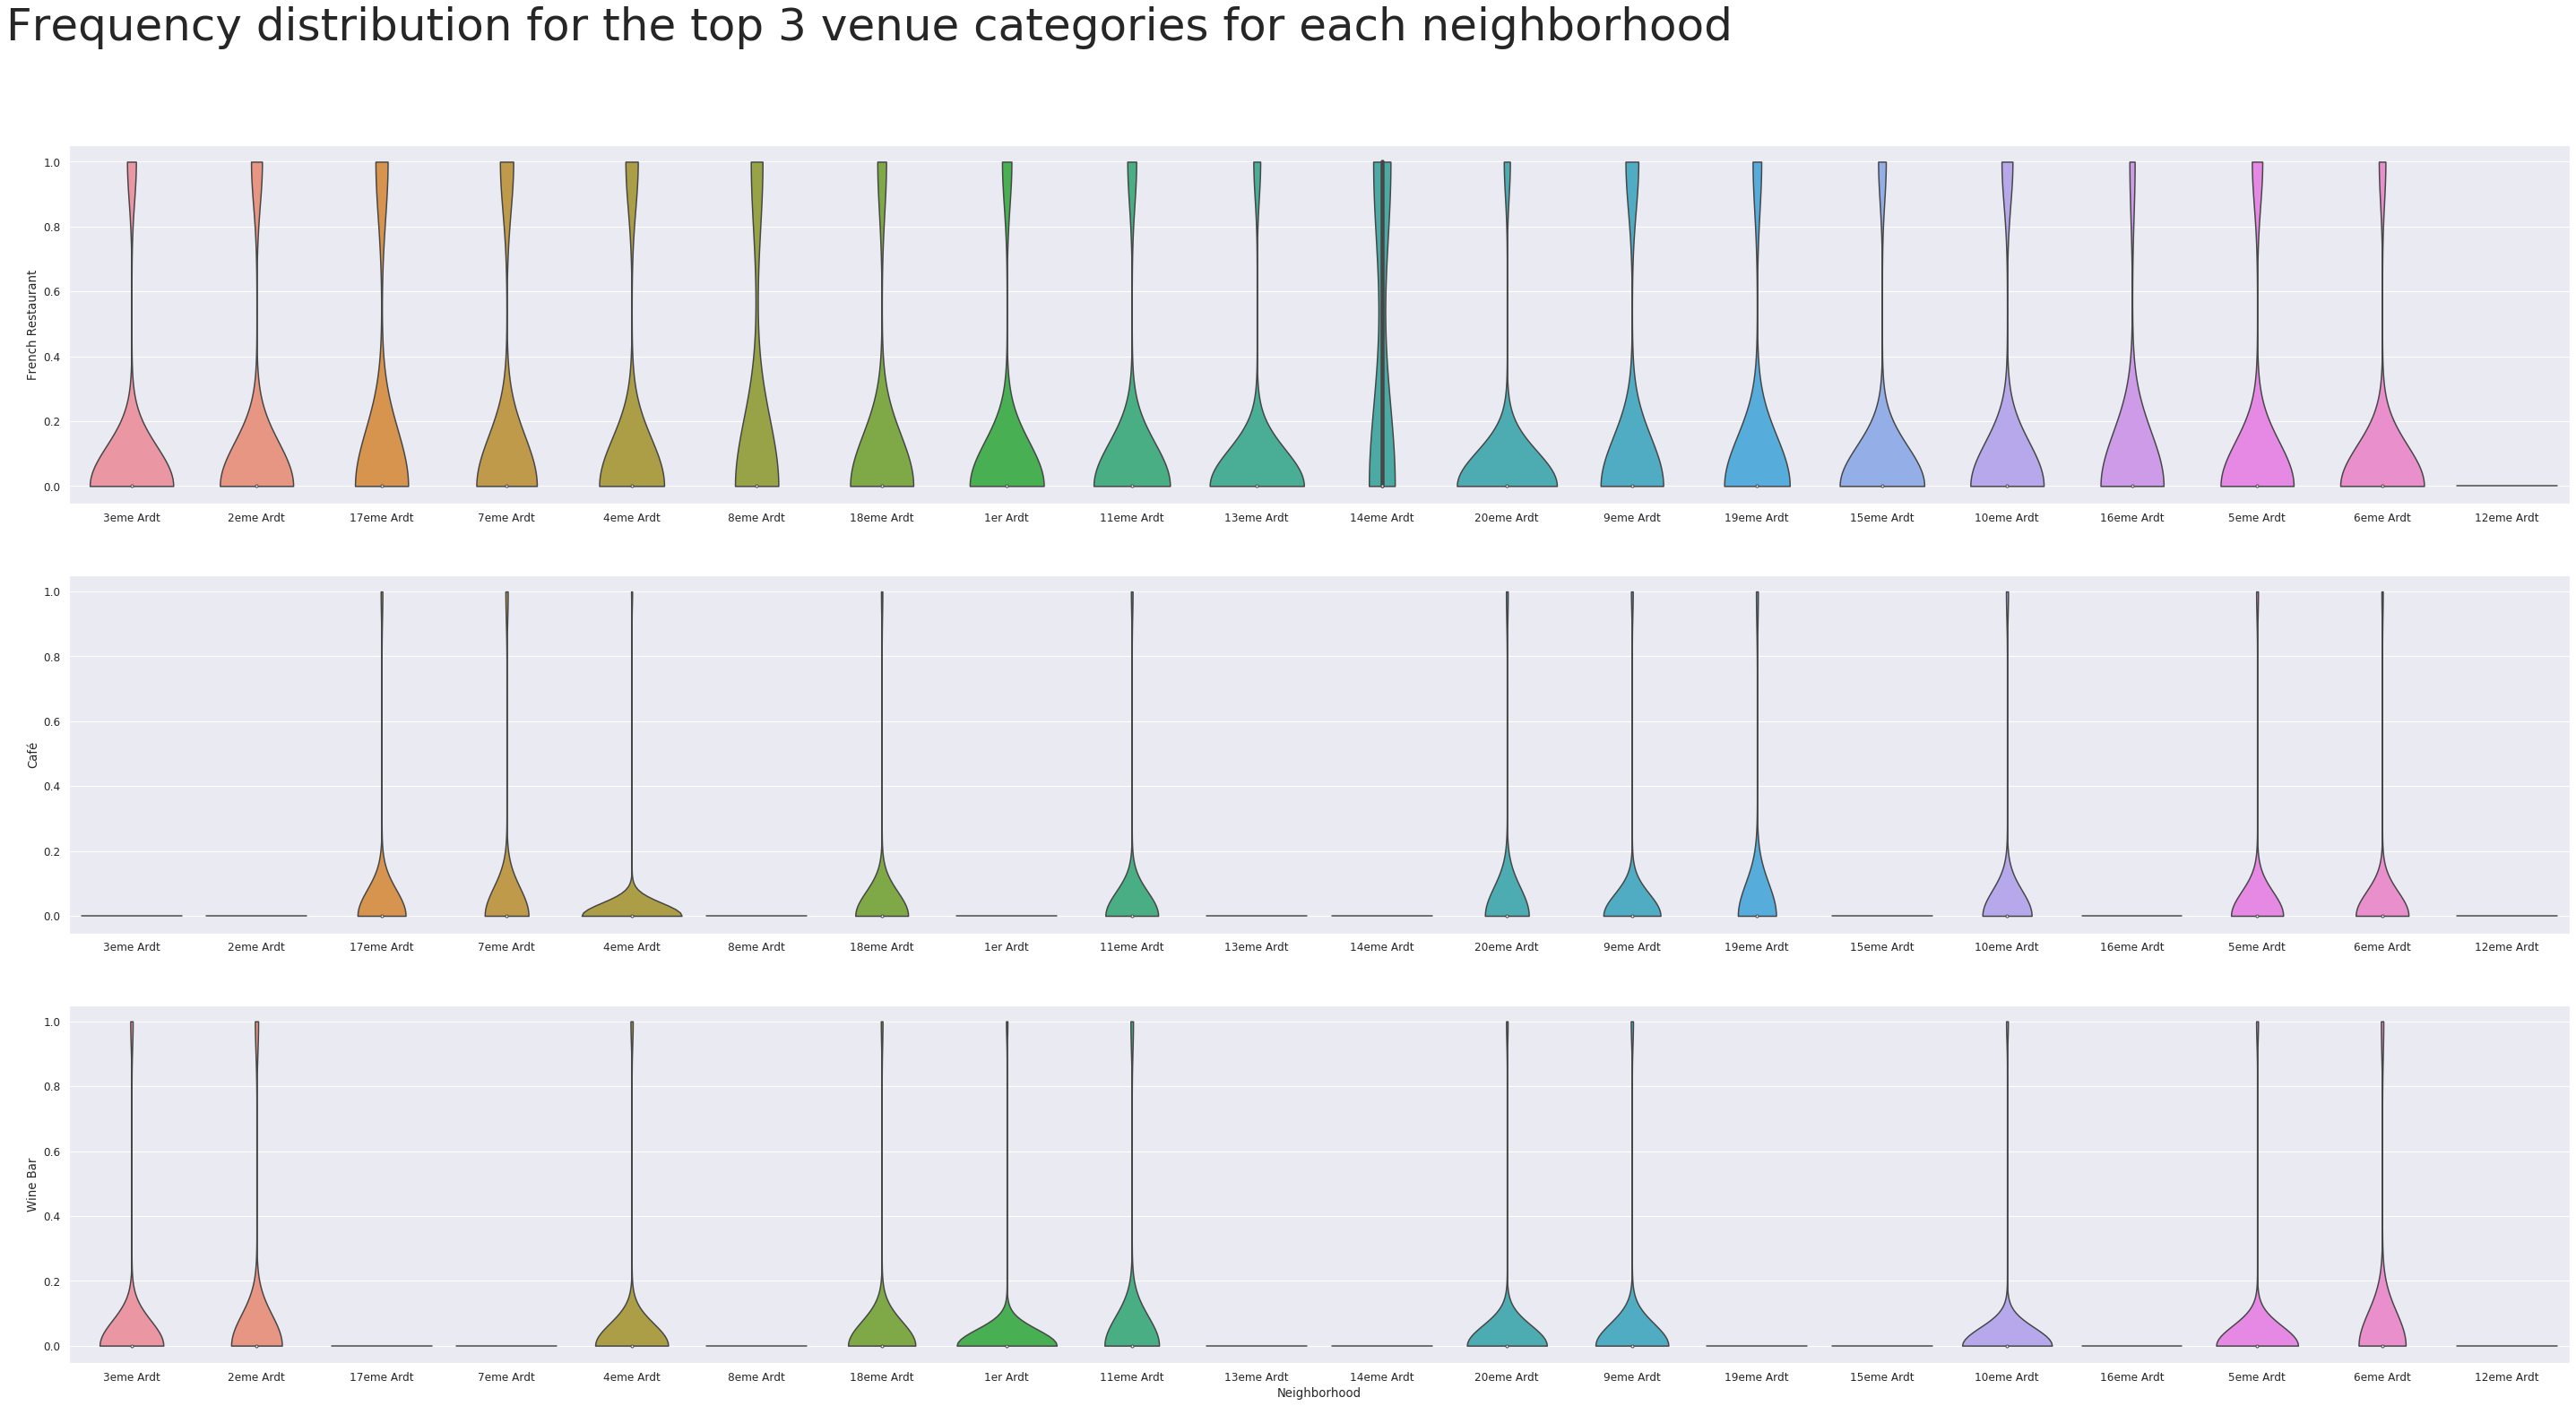

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 2.7, 'Frequency distribution for the top 3 venue categories for each neighborhood', fontsize=50)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

## So, as we can see from the above plots, there are 8 neighborhoods to open new stores as the 3 specified venues are in a great frequency there. The neighborhoods are:
### 4eme Ardt, 18eme Ardt, 11eme Ardt, 20eme Ardt, 9eme Ardt, 10eme Ardt, 5eme Ardt, 6eme Ardt

### 

### Let's take this a step further with some exploration and inferential analysis
#### We have the 8 neighborhoods that all include the venue category criteria, but if we include the "Clothing_Store" venue into the analysis, then we might be able to make some inferences based on the data, and domain knowledge of marketing and the industry, to focus the list

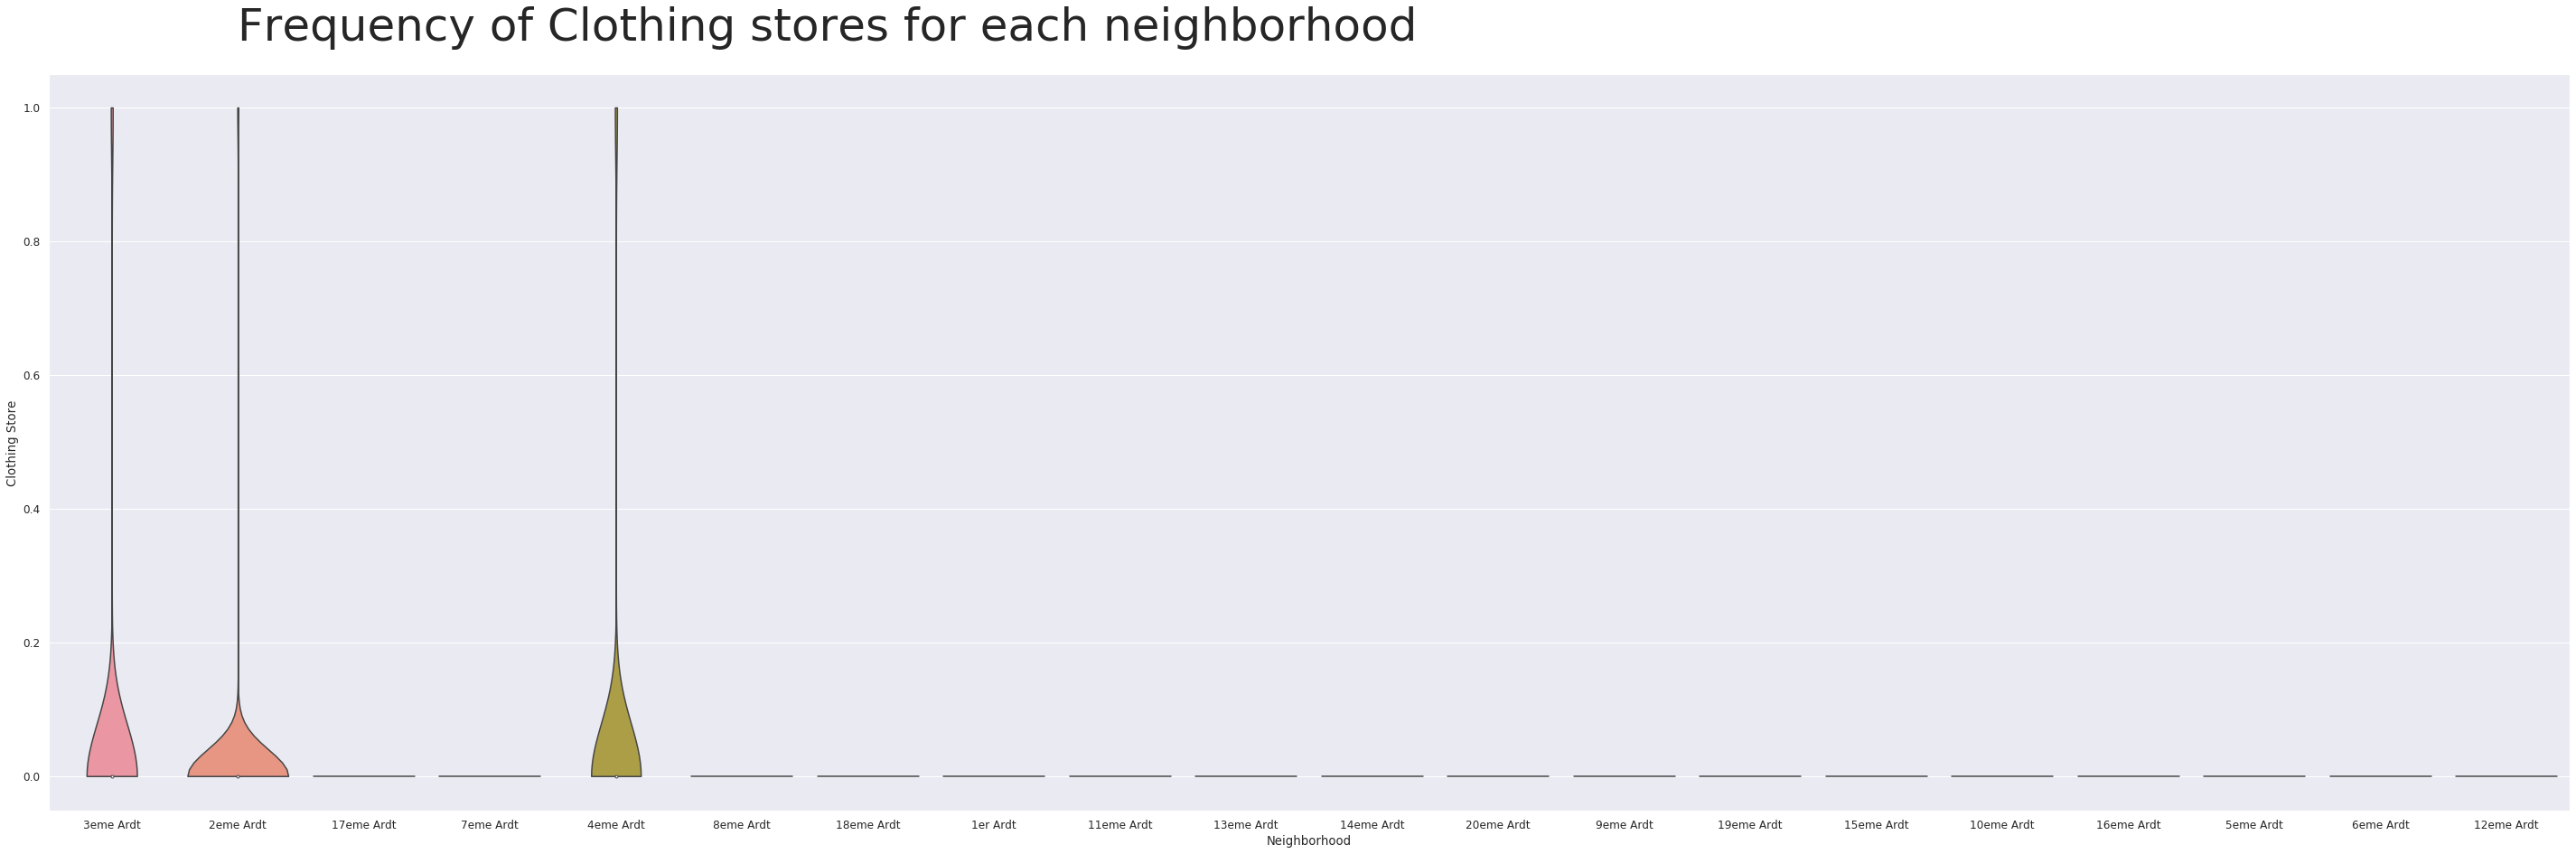

In [31]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0)
plt.xlabel("Neighborhood")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=50)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

#### Let's add the above analysis to the previous plot of 3 venues categories

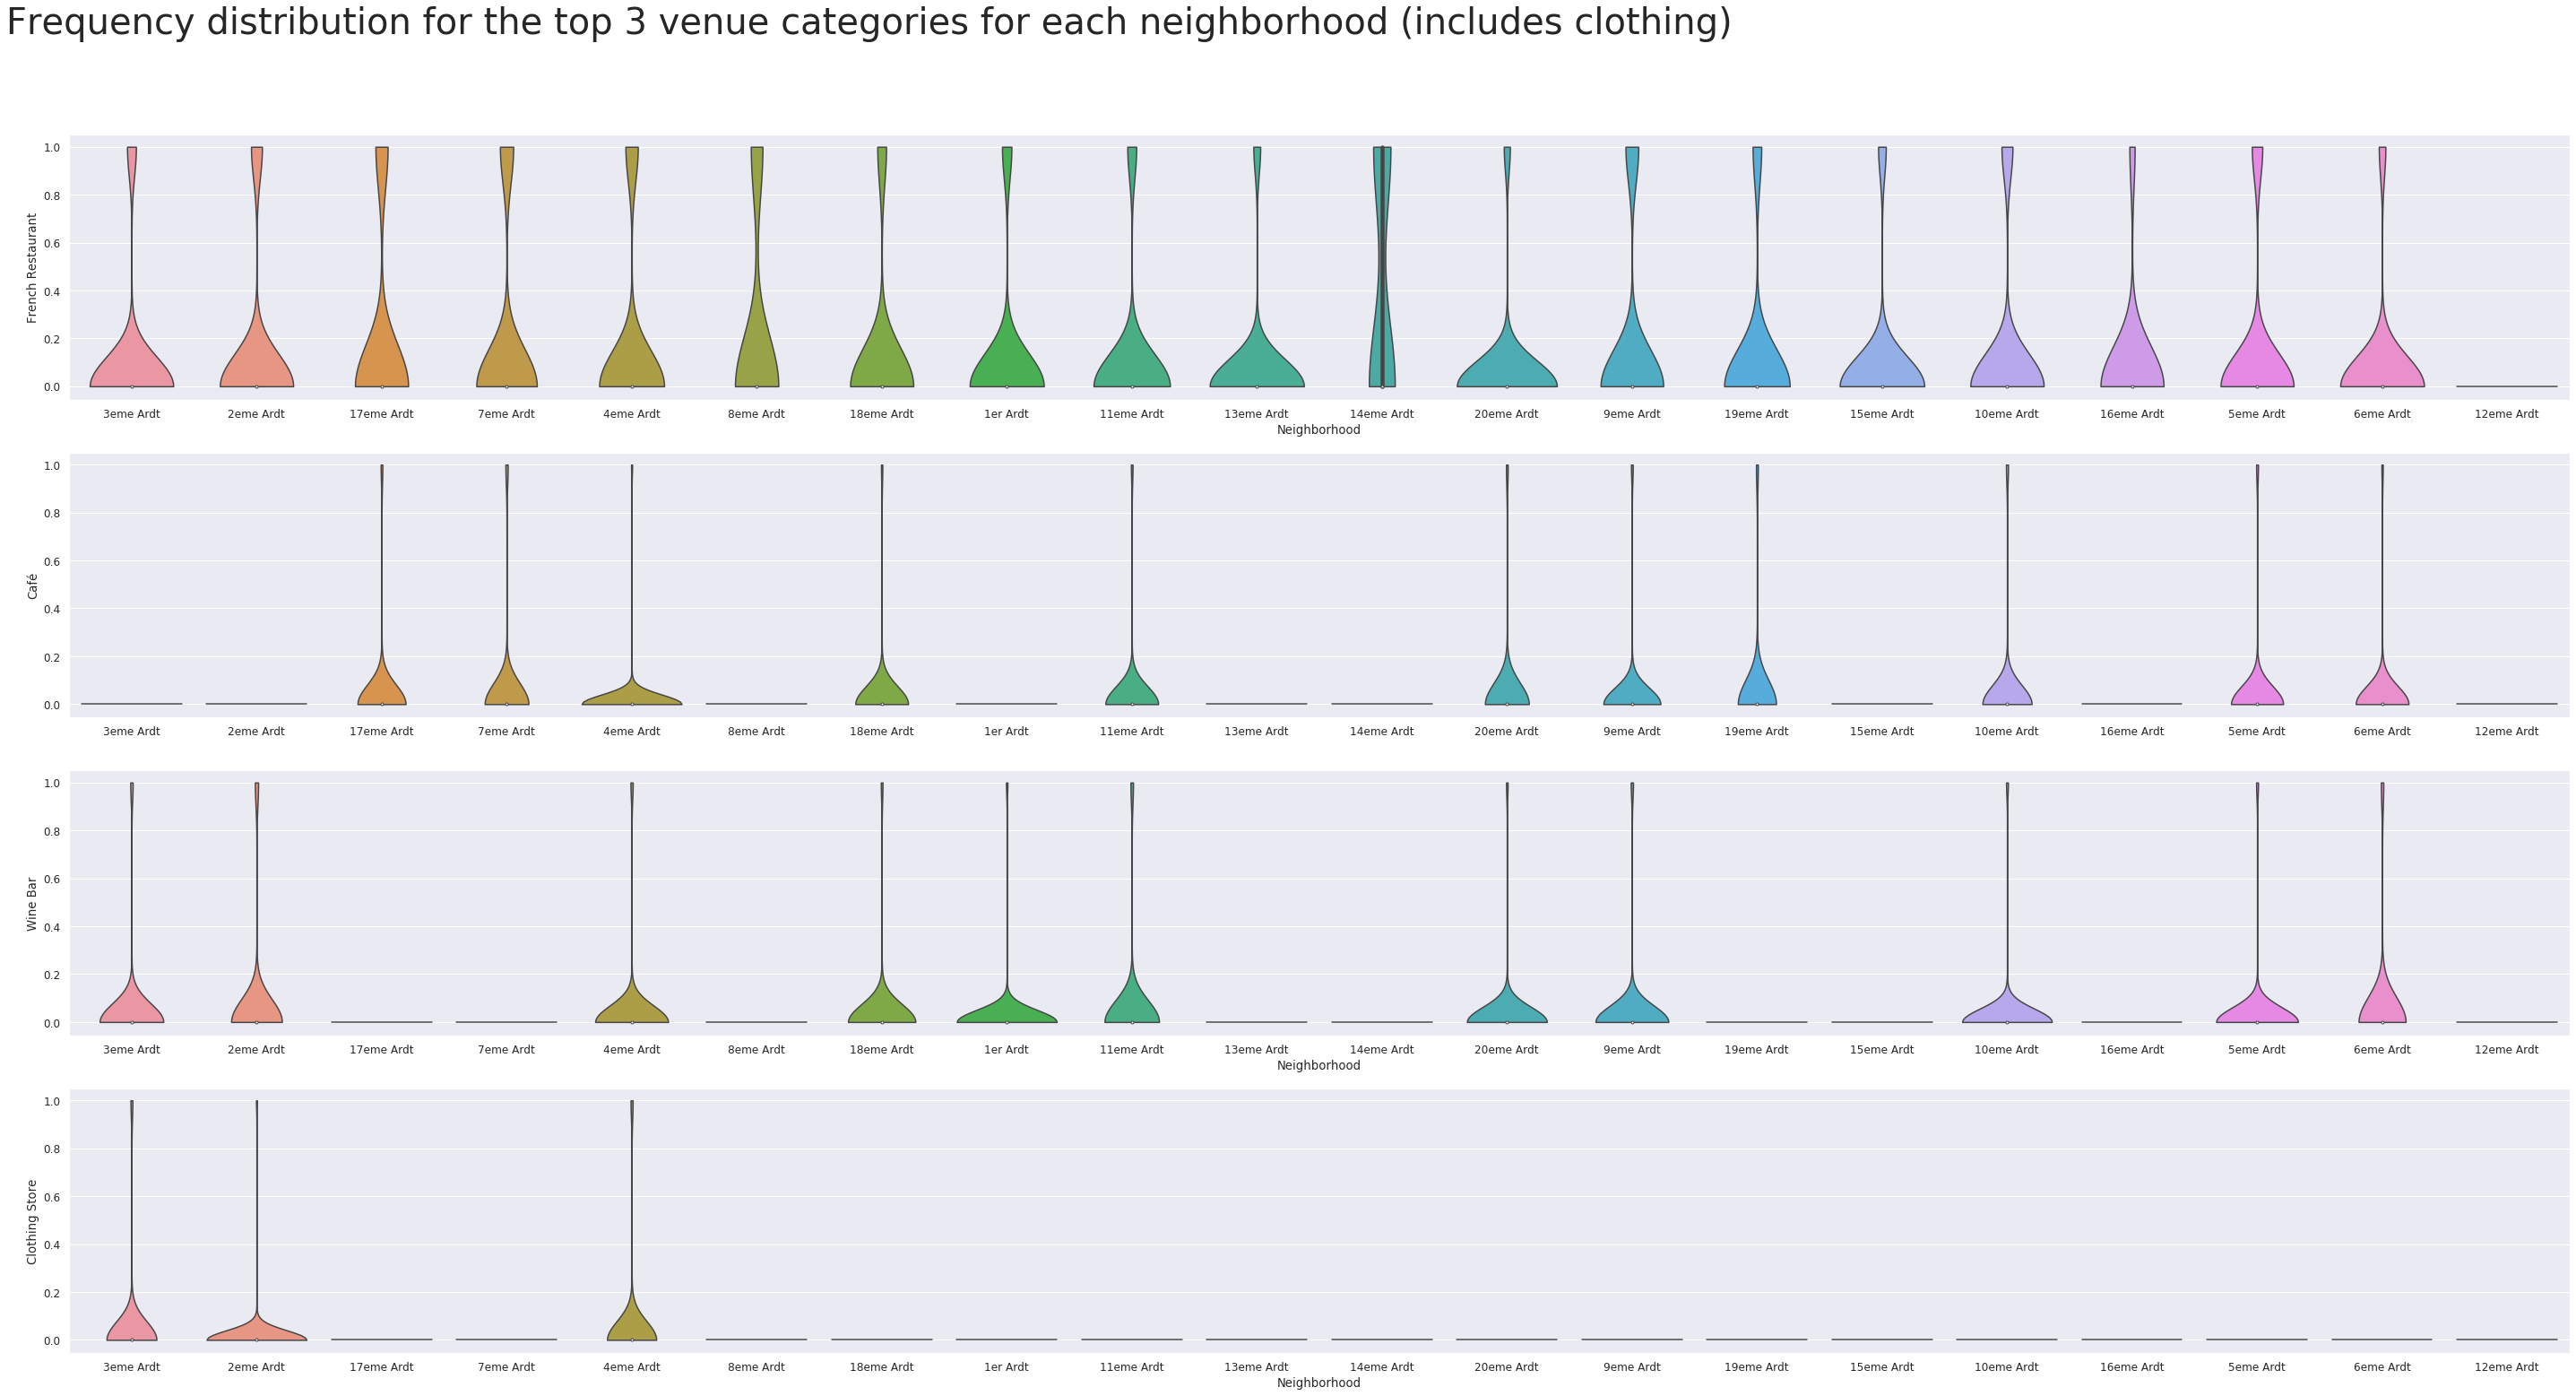

In [32]:
fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
#plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 2.8, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=40)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

#### Final chosen neighborhoods - Results - we see that there is only 1 neighbourhood filtered out of 8 – <b> 4eme Ardt <b>

In [35]:
# The csv of the chosen neighborhood was uploaded to GitHub for reference, downloaded into a new dataframe called chosen_districts

chosen_dist = pd.read_csv('https://raw.githubusercontent.com/radhikab890/Coursera_Capstone/master/Chosen_Dist.csv')
chosen_dist

,Dist_Num,Neighborhood,French_Name,Latitude,Longitude
0,4,Hotel-de-Ville,4eme Ardt,48.854341,2.35763


#### Finally, let's visualise the chosen district on the map of Paris

In [37]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_dist['Latitude'], chosen_dist['Longitude'], chosen_dist['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=50,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

### Conclusion: it's not a surprise that the district is centrally located in the circular arrangement of Paris's arrondissements. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world